In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


In [2]:
#Importing of the csv file of cleaned data and read it

csv_path = 'Resources/Cleaned_Data_Consumer_Complaints.csv'

consumer_data = pd.read_csv(csv_path)



In [3]:
#consumer_data.head(100)

In [4]:
#checking how many unique company responses to consumers were present in the dataset
issues_df = consumer_data["Company response to consumer"].unique()
list(issues_df)

['Closed with non-monetary relief',
 'Closed with explanation',
 'Closed with monetary relief',
 'Untimely response',
 'Closed',
 'Closed without relief',
 'Closed with relief']

In [5]:
# Put Responses into a list for a for loop (and later for plot labels)
Responses = ["No","Yes"]

# Create empty list to fill with closed(for plotting)
Closed = []

for Resp in Responses:

# Locate the rows which contain the company response to consumer with a "No" or "Yes" Public response.  

    formula = consumer_data.loc[consumer_data["Company public response"] == Resp]['Company response to consumer'].value_counts()
     # add subset 
    Closed.append(formula)
    
display(Closed)
#Displays total Counts for each company response to consumer for each kind of response No then Yes.

[Closed with explanation            3839
 Closed with non-monetary relief     182
 Closed with monetary relief         168
 Closed without relief               158
 Closed                               80
 Closed with relief                   18
 Untimely response                    15
 Name: Company response to consumer, dtype: int64,
 Closed with explanation            2208
 Closed with non-monetary relief     165
 Closed with monetary relief         126
 Closed                                7
 Name: Company response to consumer, dtype: int64]

In [6]:
#Dataframe with only Yes Public Responses 
Yes_response_df = consumer_data.loc[consumer_data['Company public response']!="No", :]

In [7]:
# Create a variable to hold value counts of total responses per company will result same value as above for public
total_closed_yes = Yes_response_df['Company'].value_counts()
total_closed_yes

WELLS FARGO & COMPANY                    526
BANK OF AMERICA, NATIONAL ASSOCIATION    310
Ditech Financial LLC                     211
Freedom Mortgage Company                 167
LoanCare, LLC                            116
                                        ... 
BANKUNITED, NATIONAL ASSOCIATION           1
SUCCESS MORTGAGE PARTNERS, INC             1
Reverse Mortgage Solutions, Inc.           1
SYNCHRONY FINANCIAL                        1
Castle and Cookie Mortgage LLC             1
Name: Company, Length: 165, dtype: int64

In [8]:
#Adding new column to yes response dataframe
Yes_response_df["Total Closed Responses"] = Yes_response_df['Company'].map(total_closed_yes)

C:\Users\caval\AppData\Local\Temp\ipykernel_24164\3624282959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Yes_response_df["Total Closed Responses"] = Yes_response_df['Company'].map(total_closed_yes)


In [9]:
#getting counts per company for total public responses
yes_grouped_total = Yes_response_df.groupby('Company')['Total Closed Responses'].max()
yes_grouped_total

Company
1ST PREFERENCE MORTGAGE CORP        1
360 MORTGAGE GROUP LLC              2
ALLY FINANCIAL INC.                 1
AMA Advisors, LLC.                 14
AMERICAN FINANCING CORPORATION      1
                                 ... 
WELLS FARGO & COMPANY             526
WESTSTAR MORTGAGE CORPORATION       1
WOLFE FINANCIAL, INC.               1
WSFS FINANCIAL CORPORATION          1
ZIONS BANCORPORATION                8
Name: Total Closed Responses, Length: 165, dtype: int64

In [10]:
# setting new dataframe to descending order
yes_grouped_total_df = pd.DataFrame(yes_grouped_total)
yes_grouped_total_df.sort_values(by=['Total Closed Responses'], ascending=False)

,Total Closed Responses
Company,
WELLS FARGO & COMPANY,526
"BANK OF AMERICA, NATIONAL ASSOCIATION",310
Ditech Financial LLC,211
Freedom Mortgage Company,167
"LoanCare, LLC",116
...,...
"Paramount GR Holdings, LLC",1
"Panorama Mortgage Group, LLC",1
FIRST MORTGAGE COMPANY,1


In [11]:
#Found Total Public responses for top 3 Companies
yes_final_grouped_df = yes_grouped_total_df.loc[yes_grouped_total_df['Total Closed Responses']>200]
yes_final_grouped_df = pd.DataFrame(yes_final_grouped_df)
yes_final_grouped_df

,Total Closed Responses
Company,
"BANK OF AMERICA, NATIONAL ASSOCIATION",310
Ditech Financial LLC,211
WELLS FARGO & COMPANY,526


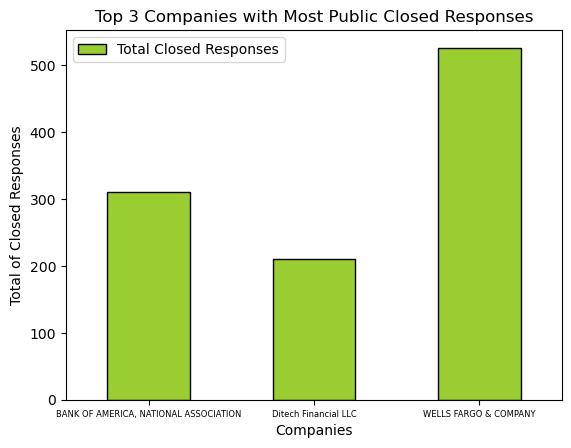

In [12]:
#Graph for top 3 Companies
yes_final_grouped_df.plot.bar(color='yellowgreen',edgecolor='black')
plt.title('Top 3 Companies with Most Public Closed Responses')
plt.xticks(rotation=0, horizontalalignment="center", fontsize=6)
plt.xlabel('Companies')
plt.ylabel('Total of Closed Responses')
plt.savefig('Images/yes_final_grouped.png')

In [13]:
#Dataframe with only No Public Responses 
No_response_df = consumer_data.loc[consumer_data['Company public response']!="Yes", :]

In [14]:
# Create a variable to hold value counts of total responses per company will result same value as above for non public
total_closed_no = No_response_df['Company'].value_counts()
total_closed_no

Ocwen Financial Corporation              703
NATIONSTAR MORTGAGE LLC                  540
BANK OF AMERICA, NATIONAL ASSOCIATION    485
JPMORGAN CHASE & CO.                     381
WELLS FARGO & COMPANY                    307
                                        ... 
CHARLES SCHWAB CORPORATION, THE            1
MORTGAGE SOLUTIONS OF COLORADO             1
Santander Consumer USA Holdings Inc.       1
MORTGAGE LENDERS OF AMERICA                1
JLM R.E. INVESTMENTS                       1
Name: Company, Length: 232, dtype: int64

In [15]:
#Adding new column to yes response dataframe
No_response_df["Total Closed Responses"] = No_response_df['Company'].map(total_closed_no)

C:\Users\caval\AppData\Local\Temp\ipykernel_24164\551786846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  No_response_df["Total Closed Responses"] = No_response_df['Company'].map(total_closed_no)


In [16]:
#getting counts per company for total public responses
no_grouped_total = No_response_df.groupby('Company')['Total Closed Responses'].max()
no_grouped_total

Company
1ST ALLIANCE LENDING, LLC         1
21ST MORTGAGE CORP.              12
360 MORTGAGE GROUP LLC            1
ACRE MORTGAGE                     1
ALEXANDER-ROSE ASSOC, INC.        1
                                 ..
WESTSTAR MORTGAGE CORPORATION     6
WILLOW BEND MORTGAGE              2
Williston Financial Group         1
Zeus Mortgage, Ltd.               1
iFreedom Direct Corporation       1
Name: Total Closed Responses, Length: 232, dtype: int64

In [17]:
# setting new dataframe to descending order
no_grouped_total_df = pd.DataFrame(no_grouped_total)
no_grouped_total_df.sort_values(by=['Total Closed Responses'], ascending=False)

,Total Closed Responses
Company,
Ocwen Financial Corporation,703
NATIONSTAR MORTGAGE LLC,540
"BANK OF AMERICA, NATIONAL ASSOCIATION",485
JPMORGAN CHASE & CO.,381
WELLS FARGO & COMPANY,307
...,...
"GMFS, LLC",1
"GEORGETOWN MORTGAGE, INC.",1
"GEORGE MASON MORTGAGE, LLC",1


In [18]:
#Found Total Non Public responses for top 3 Companies
no_final_grouped_df = no_grouped_total_df.loc[no_grouped_total_df['Total Closed Responses']>400]
no_final_grouped_df = pd.DataFrame(no_final_grouped_df)
no_final_grouped_df

,Total Closed Responses
Company,
"BANK OF AMERICA, NATIONAL ASSOCIATION",485
NATIONSTAR MORTGAGE LLC,540
Ocwen Financial Corporation,703


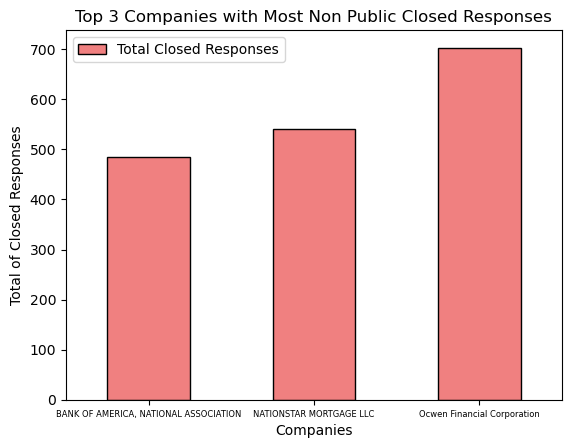

In [19]:
#Graph for top 3 Companies
no_final_grouped_df.plot.bar(color='lightcoral',edgecolor='black')
plt.title('Top 3 Companies with Most Non Public Closed Responses')
plt.xticks(rotation=0, horizontalalignment="center", fontsize=6)
plt.xlabel('Companies')
plt.ylabel('Total of Closed Responses')
plt.savefig('Images/no_final_grouped.png')

In [20]:
#BIG help from Jodee for the Merge of the two df so we can make a graph comparing the public from non
company_merge_df = pd.merge(yes_final_grouped_df, no_final_grouped_df, how='outer', on = 'Company')
display(company_merge_df)

,Total Closed Responses_x,Total Closed Responses_y
Company,,
"BANK OF AMERICA, NATIONAL ASSOCIATION",310.0,485.0
Ditech Financial LLC,211.0,NaN
WELLS FARGO & COMPANY,526.0,NaN
NATIONSTAR MORTGAGE LLC,NaN,540.0
Ocwen Financial Corporation,NaN,703.0


In [21]:
#Renaminf of Columns
Bar_df = company_merge_df.rename(columns={"Total Closed Responses_x": "Top 3 Total Public Responses", "Total Closed Responses_y": "Top 3 Total No Public Responses"})
display(Bar_df)

,Top 3 Total Public Responses,Top 3 Total No Public Responses
Company,,
"BANK OF AMERICA, NATIONAL ASSOCIATION",310.0,485.0
Ditech Financial LLC,211.0,NaN
WELLS FARGO & COMPANY,526.0,NaN
NATIONSTAR MORTGAGE LLC,NaN,540.0
Ocwen Financial Corporation,NaN,703.0


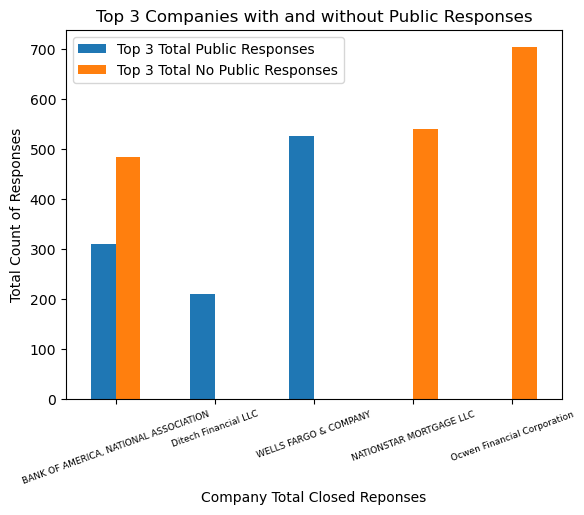

<Figure size 640x480 with 0 Axes>

In [22]:
#How to add a total count to each Bar, couldn't figure out how to change graph colors

Bar_df.plot(kind="bar")
plt.xticks(rotation=20, fontsize=6.5,horizontalalignment="center")
plt.title("Top 3 Companies with and without Public Responses")
plt.xlabel("Company Total Closed Reponses")
plt.ylabel("Total Count of Responses")
plt.show()
plt.tight_layout()
plt.savefig('Images/pubandnonpub_Company_Reponse_Data.png')

In [23]:
#Creating dataset to create bar graph for public responses that were closed with explanation
Yes_grouped_response_df = Yes_response_df.groupby('Company')['Company response to consumer'].value_counts()
Yes_grouped_response_df

Company                        Company response to consumer
1ST PREFERENCE MORTGAGE CORP   Closed with explanation          1
360 MORTGAGE GROUP LLC         Closed with explanation          2
ALLY FINANCIAL INC.            Closed with explanation          1
AMA Advisors, LLC.             Closed with explanation         12
                               Closed with monetary relief      2
                                                               ..
WELLS FARGO & COMPANY          Closed with monetary relief     30
WESTSTAR MORTGAGE CORPORATION  Closed with explanation          1
WOLFE FINANCIAL, INC.          Closed with explanation          1
WSFS FINANCIAL CORPORATION     Closed with explanation          1
ZIONS BANCORPORATION           Closed with explanation          8
Name: Company response to consumer, Length: 220, dtype: int64

In [24]:
Yes_grouped_df = pd.DataFrame(Yes_grouped_response_df)
Yes_grouped_df = Yes_grouped_df.rename(columns= {"Company response to consumer": "# of Public Responses Per Company"})

In [25]:
# Set data frame in descending order 
Yes_grouped_df.sort_values(by=['# of Public Responses Per Company'], ascending=False)

,,# of Public Responses Per Company
Company,Company response to consumer,
WELLS FARGO & COMPANY,Closed with explanation,456
"BANK OF AMERICA, NATIONAL ASSOCIATION",Closed with explanation,225
Ditech Financial LLC,Closed with explanation,181
Freedom Mortgage Company,Closed with explanation,167
"LoanCare, LLC",Closed with explanation,116
...,...,...
"Lenderfi, Inc.",Closed with non-monetary relief,1
Lending Solutions Mortgage/ LSI Mortgage,Closed with explanation,1
Lenox Financial Mortgage Corporation,Closed with non-monetary relief,1


In [26]:
#This is to show the amount of responses closed with EXPLANATION per company top 3 PUBLIC
public_complaints_df = Yes_response_df.groupby('Company response to consumer')['Company']
pub_explanation_df = public_complaints_df.get_group('Closed with explanation').value_counts()
pub_explanation_df = pd.DataFrame(pub_explanation_df)
pub_explanation_df = pub_explanation_df.rename(columns= {"Company": "Total of Explanation Responses"})
pub_exp_top_df = pub_explanation_df.loc[pub_explanation_df['Total of Explanation Responses']>180]
pub_exp_top_df = pd.DataFrame(pub_exp_top_df)
pub_exp_top_df

,Total of Explanation Responses
WELLS FARGO & COMPANY,456
"BANK OF AMERICA, NATIONAL ASSOCIATION",225
Ditech Financial LLC,181


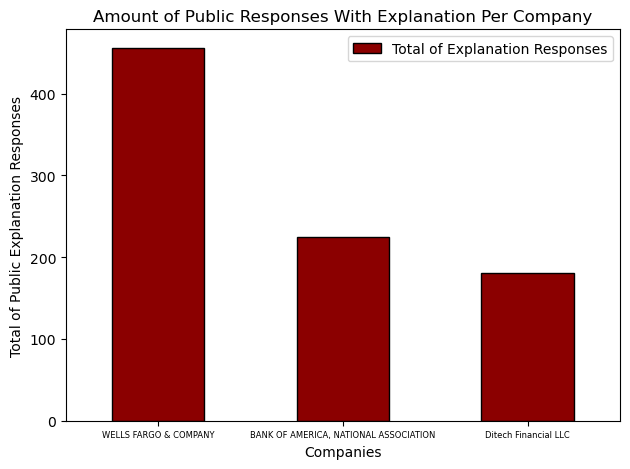

In [27]:
#Graph for Public Explanation
pub_exp_top_df.plot.bar(color='darkred',edgecolor='black')
plt.title('Amount of Public Responses With Explanation Per Company')
plt.xticks(rotation=0, horizontalalignment="center", fontsize=6)
plt.xlabel('Companies')
plt.ylabel('Total of Public Explanation Responses')
plt.tight_layout()
plt.savefig('Images/public_explanation.png')

In [28]:
#This is to show the amount of responses closed with NON-MONETARY RELIEF top 3 Public
non_monetary_p_df = public_complaints_df.get_group('Closed with non-monetary relief').value_counts()
non_monetary_p_df = pd.DataFrame(non_monetary_p_df)
non_monetary_p_df = non_monetary_p_df.rename(columns= {"Company": "Total of Non-Monetary Responses"})
public_non_monetary_top_df = non_monetary_p_df.loc[non_monetary_p_df['Total of Non-Monetary Responses']>20]
public_non_monetary_top_df = pd.DataFrame(public_non_monetary_top_df)
public_non_monetary_top_df

,Total of Non-Monetary Responses
"BANK OF AMERICA, NATIONAL ASSOCIATION",46
WELLS FARGO & COMPANY,40
Ditech Financial LLC,25


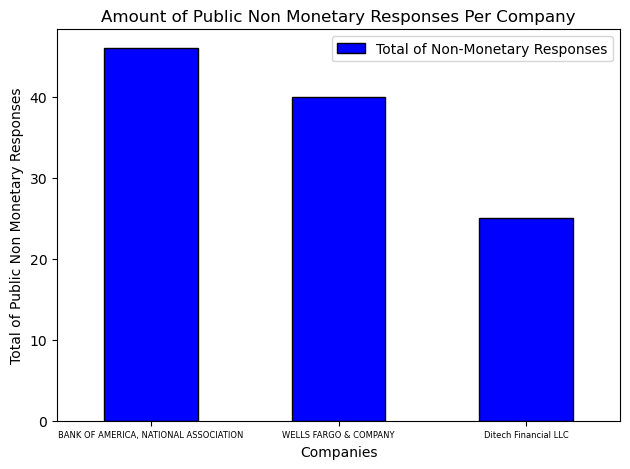

In [29]:
#Graph for Public Non-Monetary
public_non_monetary_top_df.plot.bar(color='blue',edgecolor='black')
plt.title('Amount of Public Non Monetary Responses Per Company')
plt.xticks(rotation=0, horizontalalignment="center", fontsize=6)
plt.xlabel('Companies')
plt.ylabel('Total of Public Non Monetary Responses')
plt.tight_layout()
plt.savefig('Images/public_non_monetary.png')

In [30]:
#This is to show the amount of responses closed with MONETARY RELIEF top 3 Public
monetary_df = public_complaints_df.get_group('Closed with monetary relief').value_counts()
monetary_df = pd.DataFrame(monetary_df)
monetary_df = monetary_df.rename(columns= {"Company": "Total of Monetary Responses"})
monetary_top_df = monetary_df.loc[monetary_df['Total of Monetary Responses']>5]
monetary_top_df = pd.DataFrame(monetary_top_df)
monetary_top_df

,Total of Monetary Responses
"BANK OF AMERICA, NATIONAL ASSOCIATION",36
WELLS FARGO & COMPANY,30
U.S. BANCORP,6


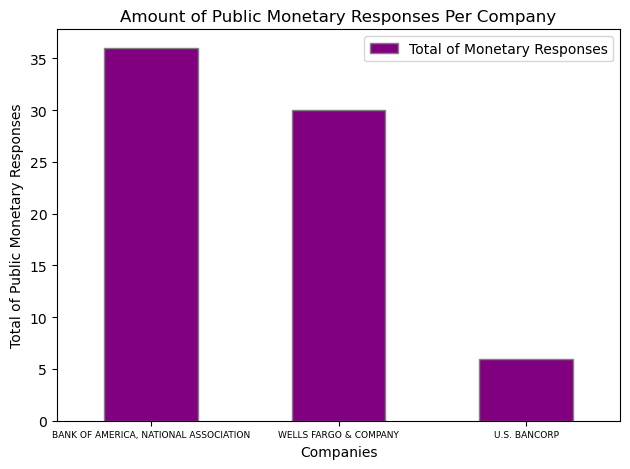

In [31]:
#Graph for Public Monetary Responses
monetary_top_df.plot.bar(color='purple',edgecolor='grey')
plt.title('Amount of Public Monetary Responses Per Company')
plt.xticks(rotation=0, horizontalalignment="center", fontsize=6.5)
plt.xlabel('Companies')
plt.ylabel('Total of Public Monetary Responses')
plt.tight_layout()
plt.savefig('Images/public_monetary.png')

In [32]:
#This is to show the amount of responses Closed top 3
closed_df = public_complaints_df.get_group('Closed').value_counts()
closed_df = pd.DataFrame(closed_df)
closed_df = closed_df.rename(columns= {"Company": "Total of Closed Responses"})
closed_df

,Total of Closed Responses
"BANK OF AMERICA, NATIONAL ASSOCIATION",3
"SERVICE 1ST MORTGAGE, INC.",1
Forthright Funding Corporation,1
RoundPoint Mortgage Servicing Corporation,1
ROCKY MOUNTAIN MORTGAGE COMPANY,1


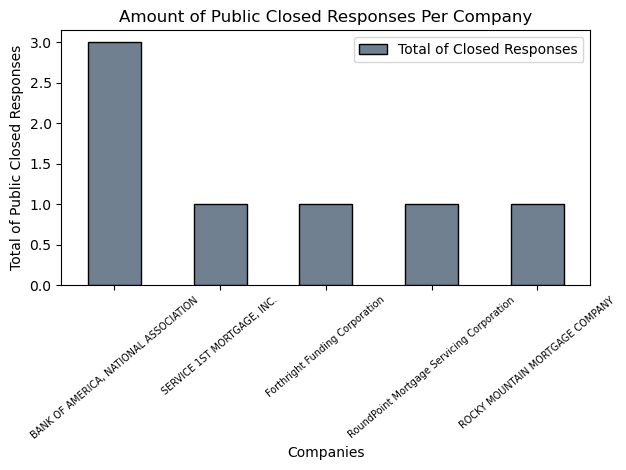

In [33]:
#graph for public closed response
closed_df.plot.bar(color='slategray',edgecolor='black')
plt.title('Amount of Public Closed Responses Per Company')
plt.xticks(rotation=40, horizontalalignment="center", fontsize=7)
plt.xlabel('Companies')
plt.ylabel('Total of Public Closed Responses')
plt.tight_layout()
plt.savefig('Images/public_closed.png')

In [34]:
#Creating Dataframes for No public responses
No_grouped_response_df = No_response_df.groupby('Company')['Company response to consumer'].value_counts()
No_grouped_response_df

Company                        Company response to consumer   
1ST ALLIANCE LENDING, LLC      Closed with explanation             1
21ST MORTGAGE CORP.            Closed with explanation            11
                               Closed with non-monetary relief     1
360 MORTGAGE GROUP LLC         Closed with explanation             1
ACRE MORTGAGE                  Closed with monetary relief         1
                                                                  ..
WESTSTAR MORTGAGE CORPORATION  Closed with explanation             6
WILLOW BEND MORTGAGE           Closed with explanation             2
Williston Financial Group      Closed with explanation             1
Zeus Mortgage, Ltd.            Closed with explanation             1
iFreedom Direct Corporation    Closed with explanation             1
Name: Company response to consumer, Length: 353, dtype: int64

In [35]:
No_grouped_df = pd.DataFrame(No_grouped_response_df)
No_grouped_df = No_grouped_df.rename(columns= {"Company response to consumer": "# of Non Public Responses Per Company"})

In [36]:
# Set data frame in descending order 
No_grouped_df.sort_values(by=['# of Non Public Responses Per Company'], ascending=False)

,,# of Non Public Responses Per Company
Company,Company response to consumer,
Ocwen Financial Corporation,Closed with explanation,644
NATIONSTAR MORTGAGE LLC,Closed with explanation,524
"BANK OF AMERICA, NATIONAL ASSOCIATION",Closed with explanation,331
JPMORGAN CHASE & CO.,Closed with explanation,310
WELLS FARGO & COMPANY,Closed with explanation,236
...,...,...
JLM R.E. INVESTMENTS,Untimely response,1
"LD Holdings Group, LLC",Closed with non-monetary relief,1
LENDER LIVE,Closed with explanation,1


In [37]:
#This is to show the amount of responses closed with EXPLANATION per company top 3 Non PUBLIC
non_public_complaints_df = No_response_df.groupby('Company response to consumer')['Company']
non_pub_explanation_df = non_public_complaints_df.get_group('Closed with explanation').value_counts()
non_pub_explanation_df = pd.DataFrame(non_pub_explanation_df)
non_pub_explanation_df = non_pub_explanation_df.rename(columns= {"Company": "Total of Non Public Explanation Responses"})
non_pub_explanation_df
non_pub_exp_top_df = non_pub_explanation_df.loc[non_pub_explanation_df['Total of Non Public Explanation Responses']>320]
non_pub_exp_top_df = pd.DataFrame(non_pub_exp_top_df)
non_pub_exp_top_df

,Total of Non Public Explanation Responses
Ocwen Financial Corporation,644
NATIONSTAR MORTGAGE LLC,524
"BANK OF AMERICA, NATIONAL ASSOCIATION",331


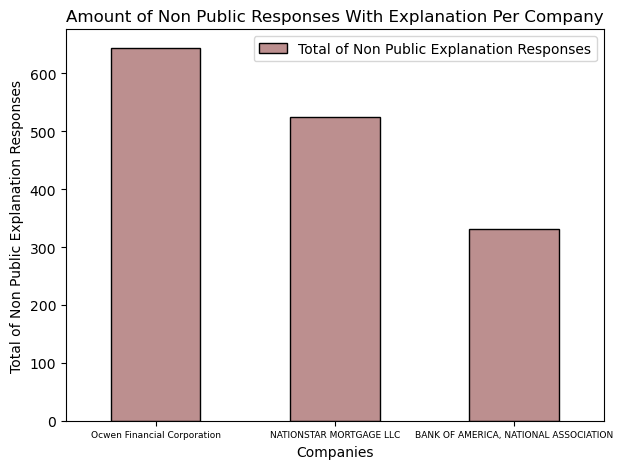

In [38]:
#Graph for Non Public Explanation
non_pub_exp_top_df.plot.bar(color='rosybrown',edgecolor='black')
plt.title('Amount of Non Public Responses With Explanation Per Company')
plt.xticks(rotation=0, horizontalalignment="center", fontsize=6.5)
plt.xlabel('Companies')
plt.ylabel('Total of Non Public Explanation Responses')
plt.tight_layout()
plt.savefig('Images/non_public_explanation.png')

In [39]:
#This is to show the amount of responses closed with NON-MONETARY RELIEF top 3 Non Public
np_non_monetary_df = non_public_complaints_df.get_group('Closed with non-monetary relief').value_counts()
np_non_monetary_df = pd.DataFrame(np_non_monetary_df)
np_non_monetary_df = np_non_monetary_df.rename(columns= {"Company": "Total of Non Public Non-Monetary Responses"})
np_non_monetary_df
nonpublic_non_monetary_top_df = np_non_monetary_df.loc[np_non_monetary_df['Total of Non Public Non-Monetary Responses']>10]
nonpublic_non_monetary_top_df = pd.DataFrame(nonpublic_non_monetary_top_df)
nonpublic_non_monetary_top_df

,Total of Non Public Non-Monetary Responses
"BANK OF AMERICA, NATIONAL ASSOCIATION",67
WELLS FARGO & COMPANY,27
BBVA FINANCIAL CORPORATION,12


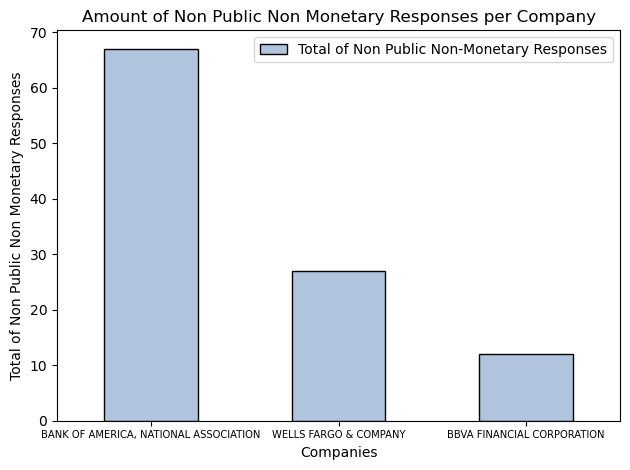

In [40]:
#Graph for Non Public Non-Monetary
nonpublic_non_monetary_top_df.plot.bar(color='lightsteelblue',edgecolor='black')
plt.title('Amount of Non Public Non Monetary Responses per Company')
plt.xticks(rotation=0, horizontalalignment="center", fontsize=7.2)
plt.xlabel('Companies')
plt.ylabel('Total of Non Public Non Monetary Responses')
plt.tight_layout()
plt.savefig('Images/nonpublic_non_monetary.png')

In [41]:
#This is to show the amount of responses closed with MONETARY RELIEF top 3 Non Public
np_monetary_df = non_public_complaints_df.get_group('Closed with monetary relief').value_counts()
np_monetary_df = pd.DataFrame(np_monetary_df)
np_monetary_df = np_monetary_df.rename(columns= {"Company": "Total of Non Public Monetary Responses"})
np_monetary_top_df = np_monetary_df.loc[np_monetary_df['Total of Non Public Monetary Responses']>11]
np_monetary_top_df = pd.DataFrame(np_monetary_top_df)
np_monetary_top_df

,Total of Non Public Monetary Responses
JPMORGAN CHASE & CO.,42
WELLS FARGO & COMPANY,12
BBVA FINANCIAL CORPORATION,12


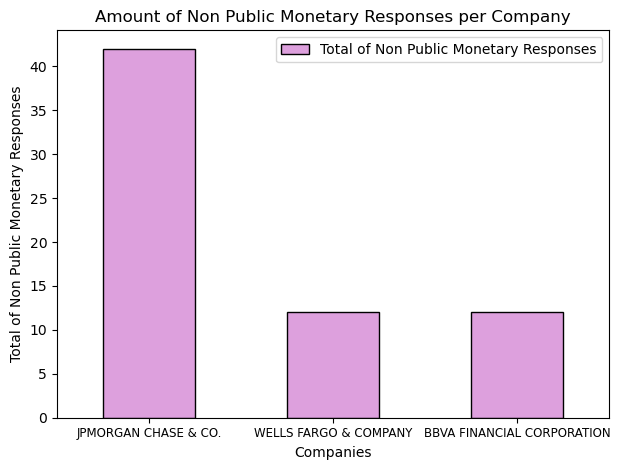

In [42]:
#Graph for Non Public Monetary
np_monetary_top_df.plot.bar(color='plum',edgecolor='black')
plt.title('Amount of Non Public Monetary Responses per Company')
plt.xticks(rotation=0, horizontalalignment="center", fontsize=8.5)
plt.xlabel('Companies')
plt.ylabel('Total of Non Public Monetary Responses')
plt.tight_layout()
plt.savefig('Images/nonpublic_monetary.png')

In [43]:
#This is to show the amount of responses Closed top 3
np_closed_df = non_public_complaints_df.get_group('Closed').value_counts()
np_closed_df = pd.DataFrame(np_closed_df)
np_closed_df = np_closed_df.rename(columns= {"Company": "Total of Non Public Closed Responses"})
np_closed_top_df = np_closed_df.loc[np_closed_df['Total of Non Public Closed Responses']>6]
np_closed_top_df = pd.DataFrame(np_closed_top_df)
np_closed_top_df

,Total of Non Public Closed Responses
Ocwen Financial Corporation,24
PNC Bank N.A.,7
Specialized Loan Servicing Holdings LLC,7


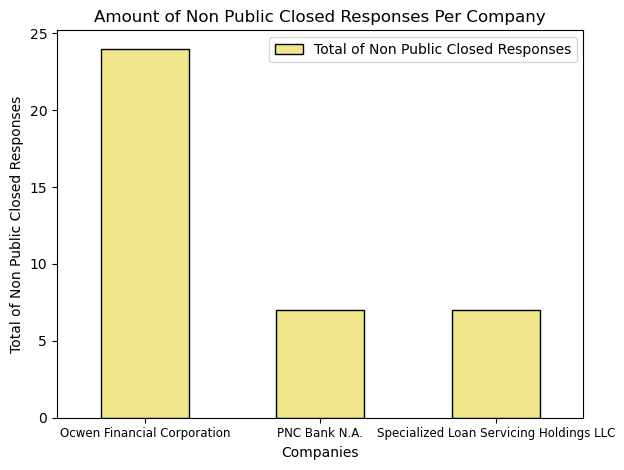

In [44]:
#graph for non public closed response
np_closed_top_df.plot.bar(color='khaki',edgecolor='black')
plt.title('Amount of Non Public Closed Responses Per Company')
plt.xticks(rotation=0, horizontalalignment="center", fontsize=8.5)
plt.xlabel('Companies')
plt.ylabel('Total of Non Public Closed Responses')
plt.tight_layout()
plt.savefig('Images/nonpublic_closed.png')

In [45]:
### Everything Past This Point Is Old And Not Needed...###
### Couldn't delete all my hard work :'( ####

In [46]:
##response_df = consumer_data.groupby(["Company response to consumer",("Company public response")])["Issue"].count()
##display(response_df)##

In [47]:
#Dataframe counting the issues by company response to consumer that gave a Public Response
##response_Y_df = Yes_response_df.groupby(["Company response to consumer"])["Issue"].count()
##display(response_Y_df)

In [48]:
# See how many different types of company responses there are

#consumer_data['Company response to consumer'].value_counts()

In [49]:
# Seeing how many different companies there are and how many times they showed up

#consumer_data['Company'].value_counts()

In [50]:
# Create a variable to hold value counts of total responses per company will result same value as above
#total_closed = consumer_data['Company'].value_counts()


In [51]:
# Added column to data frame to include the amount of TOTAL responses per company
#consumer_data["Total Closed Responses"] = consumer_data['Company'].map(total_closed)
#consumer_data

In [52]:
# New Grouped variable for total responses and .groupby for company and total closed responses
#grouped_total = consumer_data.groupby('Company')['Total Closed Responses'].max()
#grouped_total

In [53]:
#Created DataFrame for visualization and to create bar graph later 
#grouped_total_df = pd.DataFrame(grouped_total)
#grouped_total_df

In [54]:
#This does not need to be inckuded just same dataframe from above in descending order
#grouped_total_df.sort_values(by=['Total Closed Responses'], ascending=False)

In [55]:
#Final dataframe of the total closed responses for the Top 3 Companies
#final_grouped_df = grouped_total_df.loc[grouped_total_df['Total Closed Responses']>600]
#final_grouped_df = pd.DataFrame(final_grouped_df)
#final_grouped_df

In [56]:
# Graph for Top 3 Companies *in accordance with question we chose to answer*

#final_grouped_df.plot.bar(color='bisque',edgecolor='black')
#plt.title('Top 3 Companies with Most Closed Responses')
#plt.xticks(rotation=0, horizontalalignment="center", fontsize=6)
#plt.xlabel('Companies')
#plt.ylabel('Total of Closed Responses')
#plt.savefig('Images/final_grouped.png')


In [57]:
#Grouped companies with company response to count how many of each responses a certain company had

#company_grouped_response = consumer_data.groupby('Company')['Company response to consumer'].value_counts()
#company_grouped_response

In [58]:
#Created a Data Frame for the new grouped data set 

#company_grouped_df = pd.DataFrame(company_grouped_response)
#company_grouped_df = company_grouped_df.rename(columns= {"Company response to consumer": "# of Responses Per Company"})

In [59]:
# Set data frame in descending order 
#company_grouped_df.sort_values(by=['# of Responses Per Company'], ascending=False)

In [60]:
#This is to show the amount of responses closed with EXPLANATION per company top 3
#complaints_df = consumer_data.groupby('Company response to consumer')['Company']
#explanation_df = complaints_df.get_group('Closed with explanation').value_counts()
#explanation_df = pd.DataFrame(explanation_df)
#explanation_df = explanation_df.rename(columns= {"Company": "Total of Explanation Responses"})
#exp_top_df = explanation_df.loc[explanation_df['Total of Explanation Responses']>550]
#exp_top_df = pd.DataFrame(exp_top_df)
#exp_top_df

In [61]:
#This is to show the amount of responses closed with NON-MONETARY RELIEF top 3
#non_monetary_df = complaints_df.get_group('Closed with non-monetary relief').value_counts()
#non_monetary_df = pd.DataFrame(non_monetary_df)
#non_monetary_df = non_monetary_df.rename(columns= {"Company": "Total of Non-Monetary Responses"})
#non_monetary_top_df = non_monetary_df.loc[non_monetary_df['Total of Non-Monetary Responses']>20]
#non_monetary_top_df = pd.DataFrame(non_monetary_top_df)
#non_monetary_top_df

In [62]:
#This is to show the amount of responses closed with MONETARY RELIEF top 3
#monetary_df = complaints_df.get_group('Closed with monetary relief').value_counts()
#monetary_df = pd.DataFrame(monetary_df)
#monetary_df = monetary_df.rename(columns= {"Company": "Total of Monetary Responses"})
#monetary_top_df = monetary_df.loc[monetary_df['Total of Monetary Responses']>40]
#monetary_top_df = pd.DataFrame(monetary_top_df)
#monetary_top_df

In [63]:
#This is to show the amount of responses Closed without relief top 3
#no_relief_df = complaints_df.get_group('Closed without relief').value_counts()
#no_relief_df = pd.DataFrame(no_relief_df)
#no_relief_df = no_relief_df.rename(columns= {"Company": "Total of No Relief Responses"})
#no_relief_top_df = no_relief_df.loc[no_relief_df['Total of No Relief Responses']>15]
#no_relief_top_df = pd.DataFrame(no_relief_top_df)
#no_relief_top_df

In [64]:
#This is to show the amount of responses Closed top 3
#closed_df = complaints_df.get_group('Closed').value_counts()
#closed_df = pd.DataFrame(closed_df)
#closed_df = closed_df.rename(columns= {"Company": "Total of Closed Responses"})
#closedtop3_df = closed_df.loc[closed_df['Total of Closed Responses'] >= 7]
#closedtop3_df = pd.DataFrame(closedtop3_df)
#closedtop3_df

In [65]:
#This is to show the amount of responses Closed with relief top 3
#with_relief_df = complaints_df.get_group('Closed with relief').value_counts()
#with_relief_df = pd.DataFrame(with_relief_df)
#with_relief_df = with_relief_df.rename(columns= {"Company": "Total of Relief Responses"})
#relief_top_df = with_relief_df.loc[with_relief_df['Total of Relief Responses']>=3]
#relief_top_df = pd.DataFrame(relief_top_df)
#relief_top_df

In [66]:
#This is to show the amount of Untimely responses top 3
#untimely_df = complaints_df.get_group('Untimely response').value_counts()
#untimely_df = pd.DataFrame(untimely_df)
#untimely_df = untimely_df.rename(columns= {"Company": "Total of Untimely Responses"})
#untimely_df.head(10)

In [67]:
#Will not include this graph since its unlegible because of to many x values 
#untimely_df.plot.bar()
#plt.title('Amount of Untimely Responses Per Company')
#plt.xticks(rotation=80, horizontalalignment="center", fontsize=8)
#plt.xlabel('Companies')
#plt.ylabel('Total of Untimely Responses')
#plt.tight_layout()
#plt.savefig('Images/untimely.png')

In [68]:
# Will include this graph if theres time for explanation. *Bonus Graph to include in slides*
#relief_top_df.plot.bar(color='plum',edgecolor='black')
#plt.title('Amount of Responses With Relief Per Company')
#plt.xticks(rotation=0, horizontalalignment="center", fontsize=8)
#plt.xlabel('Companies')
#plt.ylabel('Total of With Relief Responses')
#plt.tight_layout()
#plt.savefig('Images/with_relief.png')

In [69]:
#Will not include this graph since theres not really an explanation on what just a "Closed response" is from a company
#closedtop3_df.plot.bar(color='slategray',edgecolor='black')
#plt.title('Amount of Closed Responses Per Company')
#plt.xticks(rotation=80, horizontalalignment="center", fontsize=8)
#plt.xlabel('Companies')
#plt.ylabel('Total of Closed Responses')
#plt.tight_layout()
#plt.savefig('Images/closed.png')

In [70]:
#Also another bonus graph to include in slides if theres enough time
#no_relief_top_df.plot.bar(color='orange',edgecolor='black')
#plt.title('Amount of No Relief Responses Per Company')
#plt.xticks(rotation=0, horizontalalignment="center", fontsize=6.5)
#plt.xlabel('Companies')
#plt.ylabel('Total of No Relief Responses')
#plt.tight_layout()
#plt.savefig('Images/no_relief.png')

In [71]:
#Will Include this graph in slides since the amount of monetary responses is significant enough to include
#monetary_top_df.plot.bar(color='purple',edgecolor='grey')
#plt.title('Amount of Monetary Responses Per Company')
#plt.xticks(rotation=0, horizontalalignment="center", fontsize=6.5)
#plt.xlabel('Companies')
#plt.ylabel('Total of Monetary Responses')
#plt.tight_layout()
#plt.savefig('Images/monetary.png')

In [72]:
#Will Include this graph in slides since the amount of non monetary responses is significant enough to include

#non_monetary_top_df.plot.bar(color='blue',edgecolor='black')
#plt.title('Amount of Non Monetary Responses Per Company')
#plt.xticks(rotation=0, horizontalalignment="center", fontsize=7)
#plt.xlabel('Companies')
#plt.ylabel('Total of Non Monetary Responses')
#plt.tight_layout()
#plt.savefig('Images/non_monetary.png')

In [73]:
#exp_top_df.plot.bar(color='darkred',edgecolor='black')
#plt.title('Amount of Responses With Explanation Per Company')
#plt.xticks(rotation=0, horizontalalignment="center", fontsize=6)
#plt.xlabel('Companies')
#plt.ylabel('Total of Explanation Responses')
#plt.tight_layout()
#plt.savefig('Images/explanation.png')